In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import seaborn as sns; sns.set(color_codes=True)
from matplotlib.colors import ListedColormap
import networkx as nx
from numpy import nan
import math
import sys
import os

In [37]:
df_train = pd.read_pickle('train_2010.pkl')
df_test = pd.read_pickle('test_2011.pkl')

In [39]:
df_train = df_train.drop(columns = ['higher_0','lower_0'])

In [100]:
df_test = df_test.dropna(subset = ['out_group'])

In [101]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5160 entries, 0 to 7402
Data columns (total 25 columns):
cusip_9                    5160 non-null object
out_degree_centrality      5160 non-null float64
in_degree_centrality       5160 non-null float64
closeness_centrality       5160 non-null float64
betweenness_centrality     5160 non-null float64
eigenvector_centrality     5160 non-null float64
harmonic_centrality        5160 non-null float64
average_neighbor_degree    5160 non-null float64
square_clustering          5160 non-null float64
core_number                5160 non-null float64
pagerank                   5160 non-null float64
hubs                       5160 non-null float64
authorities                5160 non-null float64
year_0                     5160 non-null object
in_degree_0                5160 non-null float64
out_degree_0               5160 non-null float64
in_degree_1                5160 non-null float64
out_degree_1               5160 non-null float64
in_diff      

In [40]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28918 entries, 0 to 5403
Data columns (total 23 columns):
cusip_9                    28918 non-null object
out_degree_centrality      28918 non-null float64
in_degree_centrality       28918 non-null float64
closeness_centrality       28918 non-null float64
betweenness_centrality     28918 non-null float64
eigenvector_centrality     28918 non-null float64
harmonic_centrality        28918 non-null float64
average_neighbor_degree    28918 non-null float64
square_clustering          28918 non-null float64
core_number                28918 non-null float64
pagerank                   28918 non-null float64
hubs                       28918 non-null float64
authorities                28918 non-null float64
year_0                     28918 non-null object
in_degree_0                28918 non-null float64
out_degree_0               28918 non-null float64
in_degree_1                28918 non-null float64
out_degree_1               28918 non-null fl

In [31]:
df_train.head().T

,0,1,2,3,4
cusip_9,000360206,000361105,00089L107,001031103,001084102
out_degree_centrality,0.000846024,0.000564016,0.000282008,0.000282008,0.000564016
in_degree_centrality,0,0.000282008,0,0,0.00253807
closeness_centrality,0,0.140794,0,0,0.122048
betweenness_centrality,0,2.181e-05,0,0,0.00112158
eigenvector_centrality,7.3978e-18,0.00676808,7.3978e-18,7.3978e-18,0.00146688
harmonic_centrality,0,556.132,0,0,476.103
average_neighbor_degree,1.66667,5,0,1,6
square_clustering,0,0,0,0,0
core_number,3,3,1,1,6


In [32]:
df_train.shape

(28918, 25)

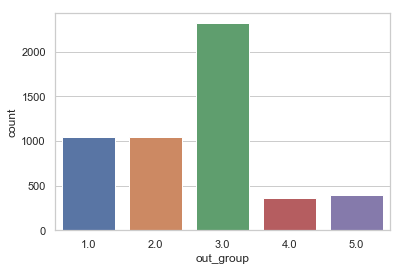

In [102]:
import seaborn as sns
sns.countplot(x="out_group", data=df_test)

In [103]:
df_test['out_group'].value_counts()

3.0    2318
1.0    1045
2.0    1045
5.0     394
4.0     358
Name: out_group, dtype: int64

In [121]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5160 entries, 0 to 7402
Data columns (total 25 columns):
cusip_9                    5160 non-null object
out_degree_centrality      5160 non-null float64
in_degree_centrality       5160 non-null float64
closeness_centrality       5160 non-null float64
betweenness_centrality     5160 non-null float64
eigenvector_centrality     5160 non-null float64
harmonic_centrality        5160 non-null float64
average_neighbor_degree    5160 non-null float64
square_clustering          5160 non-null float64
core_number                5160 non-null float64
pagerank                   5160 non-null float64
hubs                       5160 non-null float64
authorities                5160 non-null float64
year_0                     5160 non-null object
in_degree_0                5160 non-null float64
out_degree_0               5160 non-null float64
in_degree_1                5160 non-null float64
out_degree_1               5160 non-null float64
in_diff      

In [41]:
df_train = df_train.dropna(subset = ['out_group'])

In [42]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20246 entries, 0 to 5402
Data columns (total 23 columns):
cusip_9                    20246 non-null object
out_degree_centrality      20246 non-null float64
in_degree_centrality       20246 non-null float64
closeness_centrality       20246 non-null float64
betweenness_centrality     20246 non-null float64
eigenvector_centrality     20246 non-null float64
harmonic_centrality        20246 non-null float64
average_neighbor_degree    20246 non-null float64
square_clustering          20246 non-null float64
core_number                20246 non-null float64
pagerank                   20246 non-null float64
hubs                       20246 non-null float64
authorities                20246 non-null float64
year_0                     20246 non-null object
in_degree_0                20246 non-null float64
out_degree_0               20246 non-null float64
in_degree_1                20246 non-null float64
out_degree_1               20246 non-null fl

In [43]:
#df.info()

In [45]:
list(df_train.columns)

['cusip_9',
 'out_degree_centrality',
 'in_degree_centrality',
 'closeness_centrality',
 'betweenness_centrality',
 'eigenvector_centrality',
 'harmonic_centrality',
 'average_neighbor_degree',
 'square_clustering',
 'core_number',
 'pagerank',
 'hubs',
 'authorities',
 'year_0',
 'in_degree_0',
 'out_degree_0',
 'in_degree_1',
 'out_degree_1',
 'in_diff',
 'out_diff',
 'out_diff_ratio',
 'in_diff_ratio',
 'out_group']

In [46]:
network = ['out_degree_centrality','in_degree_centrality','closeness_centrality','betweenness_centrality','eigenvector_centrality','harmonic_centrality','average_neighbor_degree','square_clustering','core_number','pagerank',
 'hubs','authorities','in_degree_0','out_degree_0']

In [330]:
foundmental = ['pddur','src','upd','at','capx','cogs','cshfd','cshpri','dltt','dp','epsfi','epsfx','epspi','epspx','ib','ibmii','mii','ni','nopi','pi','ppent','reuna','sale','seq','teq','txt','wcap','xido','xint','xsga','exchg','naicsh','sich',
 'cshtr_c','dvpsp_c','dvpsx_c','prcc_c','prch_c','prcl_c','adjex_c','cshtr_f','dvpsp_f','dvpsx_f','mkvalt','prcc_f','prch_f','prcl_f','adjex_f']

In [69]:
X = df_train[network]
y = df_train['out_diff']
X = X.fillna(X.mean())
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

In [122]:
X_train = df_train[network]
y_train = df_train['out_diff']
x_test = df_test[network]
y_test = df_test['out_diff']

In [123]:
scaler = MinMaxScaler(feature_range=(-1, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [124]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [125]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1

In [126]:
model = GradientBoostingRegressor()
model.fit(X_train_scaled, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [578]:
predicted_gbr = model.predict(X_test_scaled)

In [579]:
mean_squared_error(y_test, predicted_gbr)

9.626999107442934

In [580]:
from sklearn.metrics import r2_score

In [581]:
r2_score(y_test, predicted_gbr, multioutput='variance_weighted')

0.0503480393022383

In [582]:
# Lasso
from sklearn.linear_model import Lasso

alpha = 0.1
lasso = Lasso(alpha=alpha)

y_pred_lasso = lasso.fit(X_train_scaled, y_train).predict(X_test_scaled)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : -0.000784


ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.7,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : -0.000267


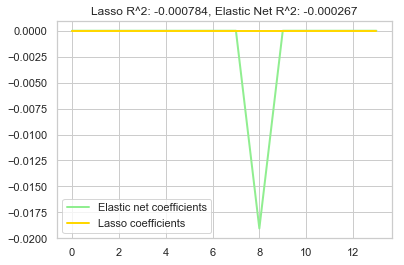

In [583]:
# ElasticNet
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=alpha, l1_ratio=0.7)

y_pred_enet = enet.fit(X_train_scaled, y_train).predict(X_test_scaled)
r2_score_enet = r2_score(y_test, y_pred_enet)
print(enet)
print("r^2 on test data : %f" % r2_score_enet)

plt.plot(enet.coef_, color='lightgreen', linewidth=2,
         label='Elastic net coefficients')
plt.plot(lasso.coef_, color='gold', linewidth=2,
         label='Lasso coefficients')
#plt.plot(coef, '--', color='navy', label='original coefficients')
plt.legend(loc='best')
plt.title("Lasso R^2: %f, Elastic Net R^2: %f"
          % (r2_score_lasso, r2_score_enet))
plt.show()

In [584]:
from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train_scaled, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test_scaled)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred, multioutput='variance_weighted'))

Coefficients: 
 [-24.28611212 -14.13237332  -0.714391     1.12100894  -1.48668326
   0.63628602   0.27336936   0.39082104   0.36798283   0.54824621
  -0.82888991   5.45857868  10.98967323  18.10640706]
Mean squared error: 9.60
Variance score: 0.05


In [585]:
from sklearn.neural_network import MLPRegressor
import numpy as np
import matplotlib.pyplot as plt

regr = MLPRegressor(
    hidden_layer_sizes=(100,100,100,100),  activation='relu', solver='adam', alpha=0.001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=True,
    random_state=0, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

regr.fit(X_train_scaled, y_train)
y_pred = regr.predict(X_test_scaled)
r2_score(y_test, y_pred)

-0.001112369178657202

In [586]:
len(y_pred), len(y_test)

(7230, 7230)

# classifier

In [77]:
X = df_train[network]
y = df_train['out_group']
X = X.fillna(X.mean())
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

In [118]:
scaler = MinMaxScaler(feature_range=(-1, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [119]:
from  sklearn.ensemble  import  GradientBoostingClassifier
from sklearn.metrics import recall_score, accuracy_score

In [127]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train_scaled, y_train)
pred = clf.predict(X_test_scaled )
accuracy_score(y_test, pred)

ValueError: Found input variables with inconsistent numbers of samples: [5160, 5062]

# xgb

In [128]:
import xgboost as xgb
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train_scaled, y_train)
predicted_xgb = model.predict(X_test_scaled )
accuracy_score(y_test, predicted_xgb)

I:\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


ValueError: Found input variables with inconsistent numbers of samples: [5160, 5062]

In [82]:
imp_features = pd.DataFrame(list(zip(X.columns, model.feature_importances_)), columns = ['features','importance_score'])
imp_features.sort_values(by='importance_score', ascending=False, inplace=True)
imp_features.set_index('features', inplace=True)
#imp_features.head()

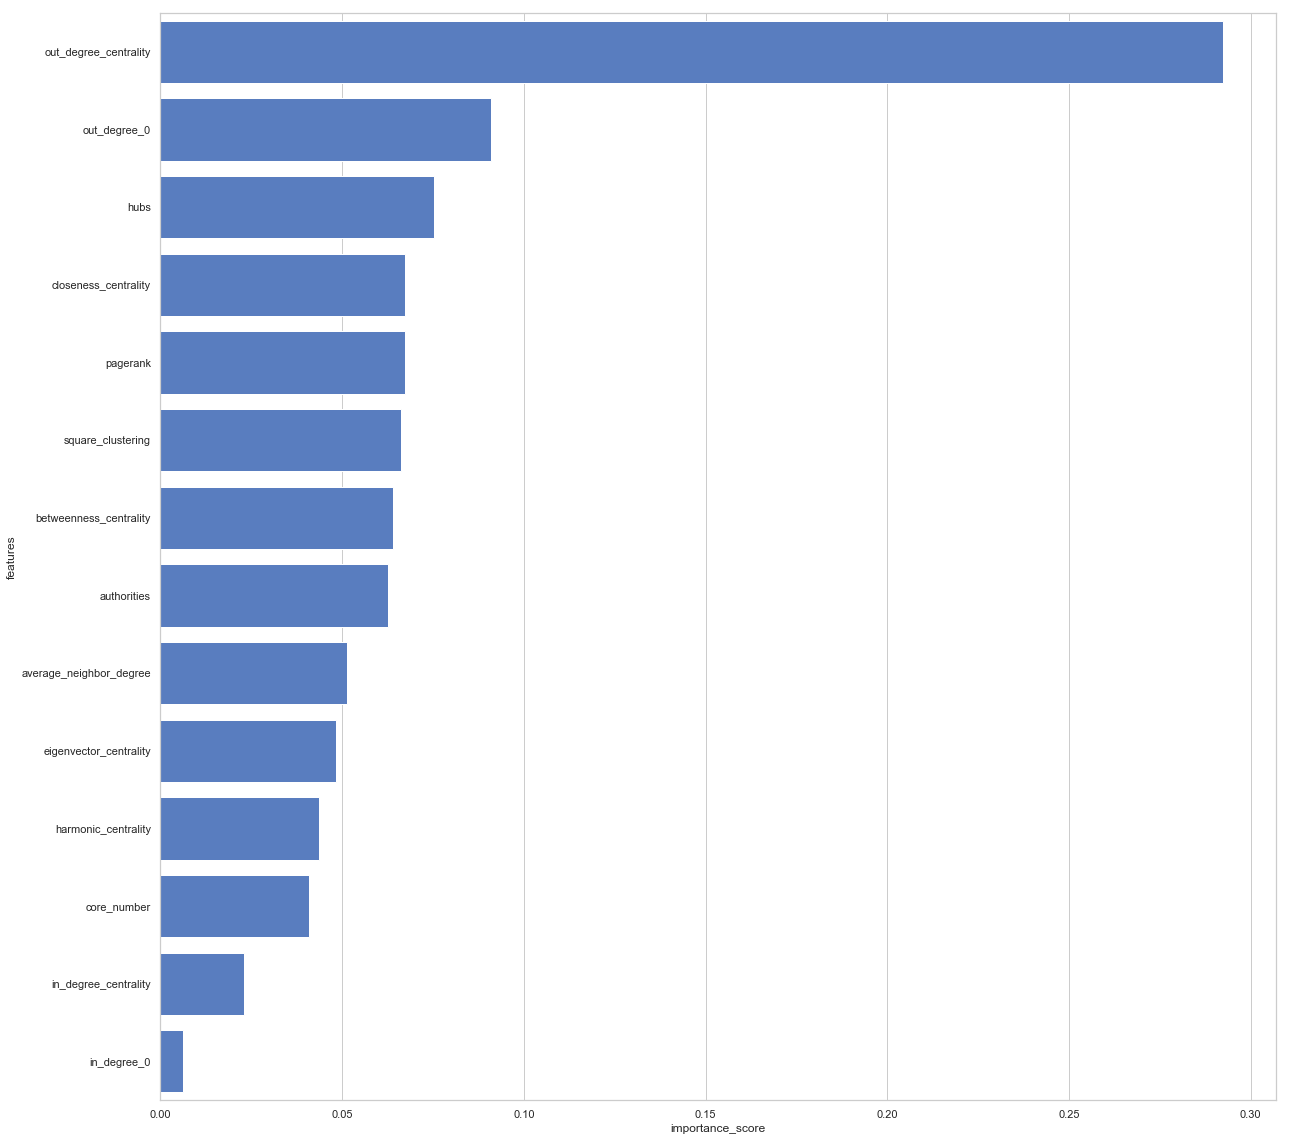

In [83]:
f, ax=plt.subplots(figsize=(20,20))
sns.set(style="whitegrid")
sns.set_color_codes("muted")
sns.barplot(x='importance_score', y=imp_features.index, data = imp_features, color='b')
plt.show()
# pylab.rcParams['figure.figsize'] = (30, 20)
# pylab.savefig('feature selection.png', dpi=400, bbox_inches = 'tight')

# KNN

In [84]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train_scaled, y_train)
pred_knn = clf.predict(X_test_scaled )
accuracy_score(y_test, pred_knn)

0.4743184512050573

In [85]:
from sklearn.linear_model import SGDClassifier

In [86]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=123)) 
ovo_clf.fit(X_train_scaled, y_train)
pred_ovo = ovo_clf.predict(X_test_scaled)
accuracy_score(y_test, pred_ovo)

I:\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
I:\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
I:\anaconda3\lib\site-packages\sklearn\linear_model\stoc

0.4381667325167918

In [87]:
from  sklearn.ensemble  import  GradientBoostingClassifier
from sklearn.metrics import recall_score, accuracy_score

In [88]:
model = GradientBoostingClassifier()
model.fit(X_train_scaled, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [89]:
predicted_gdbt = model.predict(X_test_scaled )
accuracy_score(y_test, predicted_gdbt)

0.5645989727380482

In [90]:
from sklearn.tree import DecisionTreeClassifier

In [91]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X_train_scaled, y_train)
predicted_tree = tree_clf.predict(X_test_scaled)
accuracy_score(y_test, predicted_tree)

0.5551165547214539

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid ={ 
                'max_depth' : [1,5,10,15,20,25,30],
                'min_samples_leaf' : [1,2,4,6,8,10]
                      }

classifer = RandomForestClassifier(n_jobs = -1, max_features = 'sqrt', oob_score =True)
grid_search = GridSearchCV(classifer, param_grid, cv = 10,
                          scoring = 'accuracy')
grid_search.fit(X_train_scaled, y_train)

I:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
I:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
I:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
I:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
I:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob esti

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 5, 10, 15, 20, 25, 30], 'min_samples_leaf': [1, 2, 4, 6, 8, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [93]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [94]:
clf_forest = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [95]:
clf_forest.fit(X_train_scaled, y_train)

I:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
I:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [96]:
predicted_forest = clf_forest.predict(X_test_scaled)
accuracy_score(y_test, predicted_forest)

0.561240616357171

In [97]:
clf = MLPClassifier(hidden_layer_sizes = [50,50,50], alpha=0.0001, activation='relu',
                   random_state = 0, solver='sgd', verbose = 0)
clf.fit(X_train_scaled, y_train)
predicted = clf.predict(X_test_scaled)
accuracy_score(y_test, predicted)

0.5132358751481628

In [654]:
nation = pd.read_pickle('wrds_company.pkl')

In [656]:
nation.head().T

,0,1,2,3,4
start_,2014-08-29,2014-09-18,2015-04-17,2014-08-29,2015-04-17
end_,4000-01-01,4000-01-01,4000-01-01,4000-01-01,4000-01-01
id,1000,10001,10002,10004,10005
name,Atlas Corp,Tejon Ranch Co,Tekelec / Old /,Teknowledge Corp,"Tektronix, Inc. / Old /"
name_native_lang,None,None,None,None,None
active,Y,Y,N,Y,N
covered,N,Y,Y,Y,N
ticker,ATLR,TRC,None,TEKCQ,None
investor_contact_name,None,Allen Lyda,cMike Gallentine,Dennis Bugbee,None
home_region,US,US,US,US,US


In [657]:
region = pd.read_pickle('company_region.pkl')

In [658]:
region.head()

,start_,end_,rev_,company_id,region
0,2003-04-03,4000-01-01 00:00:00,262693716.0,1000,US
1,2003-04-03,4000-01-01 00:00:00,262693717.0,10001,US
2,2003-04-03,2016-09-10 19:00:00,262693718.0,10002,US
3,2003-04-03,2005-06-15 00:00:00,262693719.0,10003,US
4,2003-04-03,4000-01-01 00:00:00,262693720.0,10004,US
